In [1]:
import ee
import numpy as np
import pandas as pd
import geemap
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(),os.pardir)))
from src import eetools as eet
from src import saveModule

In [2]:
try: 
    ee.Initialize()
except:
    ee.Authenticate()
    ee.Initialize()

In [3]:
coordenadas = "-48.53801472648439,-22.503806214013736,-48.270222978437516,-22.7281869567509"
x1, y1, x2, y2 = coordenadas.split(",")

datas = "2014-08-01,2014-12-01"
inicio, fim = datas.split(",")

escala = 30

In [4]:
geom = ee.Geometry.Polygon([[[float(x1),float(y2)],
                             [float(x2),float(y2)],
                             [float(x2),float(y1)],
                             [float(x1),float(y1)],
                             [float(x1),float(y2)]]])

latitude_central = (float(x1)+float(x2))/2
longitude_central = (float(y1)+float(y2))/2

In [5]:
collec = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')\
    .filterBounds(geom)\
    .filterDate(inicio,fim)\
    .filterMetadata('CLOUD_COVER','less_than',30)\
    .map(eet.ndvi)

In [6]:
ndvi_collec = collec\
    .select('ndvi')\
    .toBands()

ndvi_collec_bands = ndvi_collec\
    .bandNames()\
    .getInfo()

In [7]:
blended = ee.Image(99999).blend(ndvi_collec)

In [8]:
ts = eet.extrair_lonlat(blended,geom,ndvi_collec_bands,escala)
ts

,LC08_220076_20140911_ndvi,LC08_220076_20141013_ndvi,LC08_220076_20141029_ndvi,LC08_221075_20140801_ndvi,LC08_221075_20140817_ndvi,LC08_221075_20140902_ndvi,LC08_221075_20140918_ndvi,LC08_221075_20141004_ndvi,LC08_221075_20141105_ndvi,LC08_221076_20140801_ndvi,LC08_221076_20140902_ndvi,LC08_221076_20140918_ndvi,LC08_221076_20141004_ndvi,latitude,longitude
0,0.328715,0.482913,0.465691,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,-22.728169,-48.537927
1,0.705186,0.687115,0.750785,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,-22.728169,-48.537627
2,0.747272,0.724499,0.777710,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,-22.728169,-48.537327
3,0.709579,0.729393,0.819333,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,-22.728169,-48.537027
4,0.737570,0.742866,0.824793,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,-22.728169,-48.536727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667211,0.455296,0.238938,0.299978,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,-22.503906,-48.271634
667212,0.447883,0.242439,0.317909,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,-22.503906,-48.271334
667213,0.458235,0.240911,0.320276,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,-22.503906,-48.271033
667214,0.430154,0.241740,0.319300,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,-22.503906,-48.270733


In [9]:
def corrigir_dummies(df):
    for i in range(0,len(df.columns)):
        for j in range(0,len(df.iloc[:,i])):
            if df.iloc[j,i] == 99999:
                df.iat[j,i] = df.iloc[j,i-1]
    return df

In [10]:
subset = ts.iloc[:,[0,1,3,13,14]].head(500)
subset

,LC08_220076_20140911_ndvi,LC08_220076_20141013_ndvi,LC08_221075_20140801_ndvi,latitude,longitude
0,0.328715,0.482913,99999.0,-22.728169,-48.537927
1,0.705186,0.687115,99999.0,-22.728169,-48.537627
2,0.747272,0.724499,99999.0,-22.728169,-48.537327
3,0.709579,0.729393,99999.0,-22.728169,-48.537027
4,0.737570,0.742866,99999.0,-22.728169,-48.536727
...,...,...,...,...,...
495,0.680814,0.642901,99999.0,-22.728169,-48.389319
496,0.634162,0.630641,99999.0,-22.728169,-48.389019
497,0.618892,0.611662,99999.0,-22.728169,-48.388719
498,0.656516,0.599762,99999.0,-22.728169,-48.388419


In [11]:
corrigir_dummies(subset)

,LC08_220076_20140911_ndvi,LC08_220076_20141013_ndvi,LC08_221075_20140801_ndvi,latitude,longitude
0,0.328715,0.482913,0.482913,-22.728169,-48.537927
1,0.705186,0.687115,0.687115,-22.728169,-48.537627
2,0.747272,0.724499,0.724499,-22.728169,-48.537327
3,0.709579,0.729393,0.729393,-22.728169,-48.537027
4,0.737570,0.742866,0.742866,-22.728169,-48.536727
...,...,...,...,...,...
495,0.680814,0.642901,0.642901,-22.728169,-48.389319
496,0.634162,0.630641,0.630641,-22.728169,-48.389019
497,0.618892,0.611662,0.611662,-22.728169,-48.388719
498,0.656516,0.599762,0.599762,-22.728169,-48.388419


In [12]:
image = ts.iloc[:,[0,1,2,13,14]]
image

,LC08_220076_20140911_ndvi,LC08_220076_20141013_ndvi,LC08_220076_20141029_ndvi,latitude,longitude
0,0.328715,0.482913,0.465691,-22.728169,-48.537927
1,0.705186,0.687115,0.750785,-22.728169,-48.537627
2,0.747272,0.724499,0.777710,-22.728169,-48.537327
3,0.709579,0.729393,0.819333,-22.728169,-48.537027
4,0.737570,0.742866,0.824793,-22.728169,-48.536727
...,...,...,...,...,...
667211,0.455296,0.238938,0.299978,-22.503906,-48.271634
667212,0.447883,0.242439,0.317909,-22.503906,-48.271334
667213,0.458235,0.240911,0.320276,-22.503906,-48.271033
667214,0.430154,0.241740,0.319300,-22.503906,-48.270733


In [15]:
image.columns

Index(['LC08_220076_20140911_ndvi', 'LC08_220076_20141013_ndvi',
       'LC08_220076_20141029_ndvi', 'latitude', 'longitude'],
      dtype='object')

In [16]:
image = image.rename(columns={"latitude":"Latitude","longitude":"Longitude"})
image

,LC08_220076_20140911_ndvi,LC08_220076_20141013_ndvi,LC08_220076_20141029_ndvi,Latitude,Longitude
0,0.328715,0.482913,0.465691,-22.728169,-48.537927
1,0.705186,0.687115,0.750785,-22.728169,-48.537627
2,0.747272,0.724499,0.777710,-22.728169,-48.537327
3,0.709579,0.729393,0.819333,-22.728169,-48.537027
4,0.737570,0.742866,0.824793,-22.728169,-48.536727
...,...,...,...,...,...
667211,0.455296,0.238938,0.299978,-22.503906,-48.271634
667212,0.447883,0.242439,0.317909,-22.503906,-48.271334
667213,0.458235,0.240911,0.320276,-22.503906,-48.271033
667214,0.430154,0.241740,0.319300,-22.503906,-48.270733


In [18]:
saveModule.save_tiff_from_df(
    image,
    ['LC08_220076_20140911_ndvi', 'LC08_220076_20141013_ndvi','LC08_220076_20141029_ndvi'],
    99999,
    "imagem.tif",
    "EPSG:4326"
)

True

In [19]:
from osgeo import gdal

In [20]:
filepath = r'imagem.tif'

raster = gdal.Open(filepath)

type(raster)

osgeo.gdal.Dataset

In [21]:
raster.RasterCount

3

In [22]:
array = raster.GetRasterBand(2).ReadAsArray()
array.shape

(748, 892)

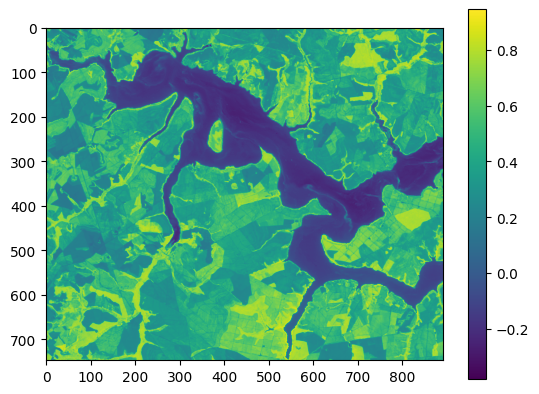

In [23]:
plt.imshow(array)
plt.colorbar()